# Funciones a integrar 
Limites [0,10]


In [1]:
A = 0
B = 10

def recta(x:float):
    return x

def cuadratica(x:float):
    return -x**2 + 8*x -10  # -((x-4)**2) + 6

#  Mostrar graficas

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def mostrar_fun(fun, a, b):
    # Defina el rango de valores para x
    x = np.linspace(a, b, dtype=float)
    
    # Calcule los valores de y para cada valor de x
    y = fun(x)

    # Omitir valores negativos
    y = np.where(y<0, 0, y)

    # Cree el gráfico
    plt.plot(x, y)

    # Añada etiquetas a los ejes
    plt.xlabel('x')
    plt.ylabel('f(x)')

    # Muestre el gráfico
    plt.show()

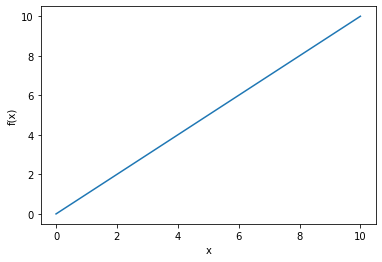

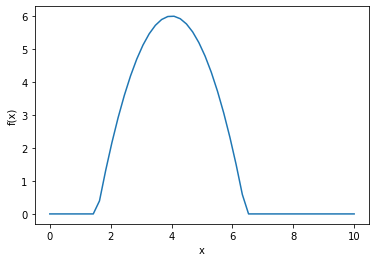

In [4]:
mostrar_fun(recta, A, B)
mostrar_fun(cuadratica, A, B)


# Funcion debe ser positiva, calculamos los cortes

In [5]:
from math import sqrt

In [6]:
def calcular(A, B, C):
    if ((B**2)-4*A*C) < 0:
        print("La solución de la ecuación es con números complejos")
    else:
        x1 = (-B+sqrt(B**2-(4*A*C)))/(2*A)
        x2 = (-B-sqrt(B**2-(4*A*C)))/(2*A)
        print("""Las soluciones de la ecuación son:
                    x1 = {}
                    x2 = {} """.format(x1, x2))
    return x1,x2

In [7]:
corte_x1, corte_x2 = calcular(-1, 8, -10)

A = corte_x1
B = corte_x2

Las soluciones de la ecuación son:
                    x1 = 1.5505102572168221
                    x2 = 6.449489742783178 


# Integrar con libreria Scipy

In [8]:
from scipy import integrate as itg

In [9]:
valor, error = itg.quad(cuadratica, A, B)
print("Integral definida entre a:", A, "y b:", B, "\nvalor:", valor , "\nerror:", error)


Integral definida entre a: 1.5505102572168221 y b: 6.449489742783178 
valor: 19.595917942265423 
error: 2.1755839288168292e-13


# Integral con Metodo de Monte Carlo
## Calculo del  maximo (M) de la función

In [10]:
from scipy.optimize import minimize_scalar

In [11]:
def max_cuadratica(fun, corte_x1, corte_x2):
    return minimize_scalar(fun, method="bounded", bounds=(corte_x1, corte_x2))

In [12]:
x = max_cuadratica(cuadratica, corte_x1, corte_x2).x

print(x)

6.44948627808869


In [24]:
def max_fun(fun, a, b):
    x = np.linspace(a, b, dtype=int)
    y = fun(x)
    return max(y)

Calcular el maximo es bastante jodido suponemos que lo sabemos en el caso de la curva , x = 4 , f(4) = 6

In [14]:
M = 6 

print(max_fun(cuadratica, A, B))

6


## Generar puntos aleatorios dentro del rectangulo
### Condiciones 
- Punto (x,y) , x < y 
- A <= x <= B donde A,B limites de integración
- 0 <= y <= MAX_FUNC 

In [15]:
import random as rd

In [16]:
def random_point(min_x, max_x, min_y, max_y):
    return (rd.uniform(min_x, max_x), rd.uniform(min_y, max_y))

In [17]:
max_fun = M
num_puntos = 5
puntos = [  random_point(A, B, 0, max_fun) for i in range(num_puntos)]
puntos 

[(3.7103355466155916, 5.3827512032810825),
 (2.6726165918092732, 2.1466077758131274),
 (2.7255068904183637, 0.4438903333284505),
 (4.246496044502652, 2.942780651948005),
 (5.275176961969239, 0.6564089109424123)]

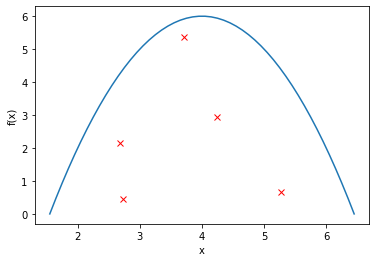

In [18]:
# Defina el rango de valores para x
x = np.linspace(A, B, dtype=float)

# Calcule los valores de y para cada valor de x
y = cuadratica(x)

# Cree el gráfico
plt.plot(x, y)

p_x, p_y = zip(*puntos)
plt.plot(p_x, p_y,"x",color="red")

# Añada etiquetas a los ejes
plt.xlabel('x')
plt.ylabel('f(x)')

# Muestre el gráfico
plt.show()



In [19]:
def under_fun(fun, x, y):
    f_x = fun(x)
    if f_x > y:
        return True
    else:
        return False

In [20]:
def integra_mc_iterative(fun, a, b, num_puntos=10000):

    if a < 0 or b < 0 :
        raise(Exception("a and b should be greater than 0"))

    maxi = max_fun(fun, a, b)
    puntos = [ random_point(a, b, 0, maxi) for i in range(num_puntos)]
    n_under = 0

    for x, y in puntos:
        if under_fun( fun, x, y):
            n_under+=1

    #print("Porcentaje de n_under/n_total", n_under/num_puntos)
    return (n_under/num_puntos) * (b-a) * M


In [21]:
def integra_mc_iterative2(fun, a, b, num_puntos=10000):

    if a < 0 or b < 0 :
        raise(Exception("a and b should be greater than 0"))

    maxi = max_fun(fun, a, b)
    puntos = [ random_point(a, b, 0, maxi) for i in range(num_puntos)]

    x_p, y_p = zip(*puntos)

    f_p = [ fun(x) for x in x_p]
    
    n_under = sum(1 for f_i, y_i in zip(f_p, y_p) if f_i > y_i)

    #print("Porcentaje de n_under/n_total", n_under/num_puntos)
    return (n_under/num_puntos) * (b-a) * M

In [22]:
def integra_mc_vector(fun, a, b, num_puntos=10000):

    if a < 0 or b < 0 :
        raise(Exception("a and b should be greater than 0"))

    maxi = max_fun(fun, a, b)
    
    x_p = np.random.uniform(a, b, num_puntos)
    y_p = np.random.uniform(0, maxi, num_puntos)

    fun_vec = np.vectorize(fun)

    f_p = fun_vec(x_p)

    cmps = f_p > y_p
        
    n_under = np.count_nonzero(cmps)

    #print("Porcentaje de n_under/n_total", n_under/num_puntos)
    return (n_under/num_puntos) * (b-a) * M

In [25]:
print(integra_mc_iterative(cuadratica, A, B))
print(integra_mc_iterative2(cuadratica, A, B))
print(integra_mc_vector(cuadratica, A, B))

19.605715901236557
19.934927322666617
19.441110190521528


In [29]:
%timeit -n 5 integra_mc_iterative(cuadratica, A, B)


88.1 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [30]:
%timeit -n 5 integra_mc_vector(cuadratica, A, B)

10.8 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
